# Regularization

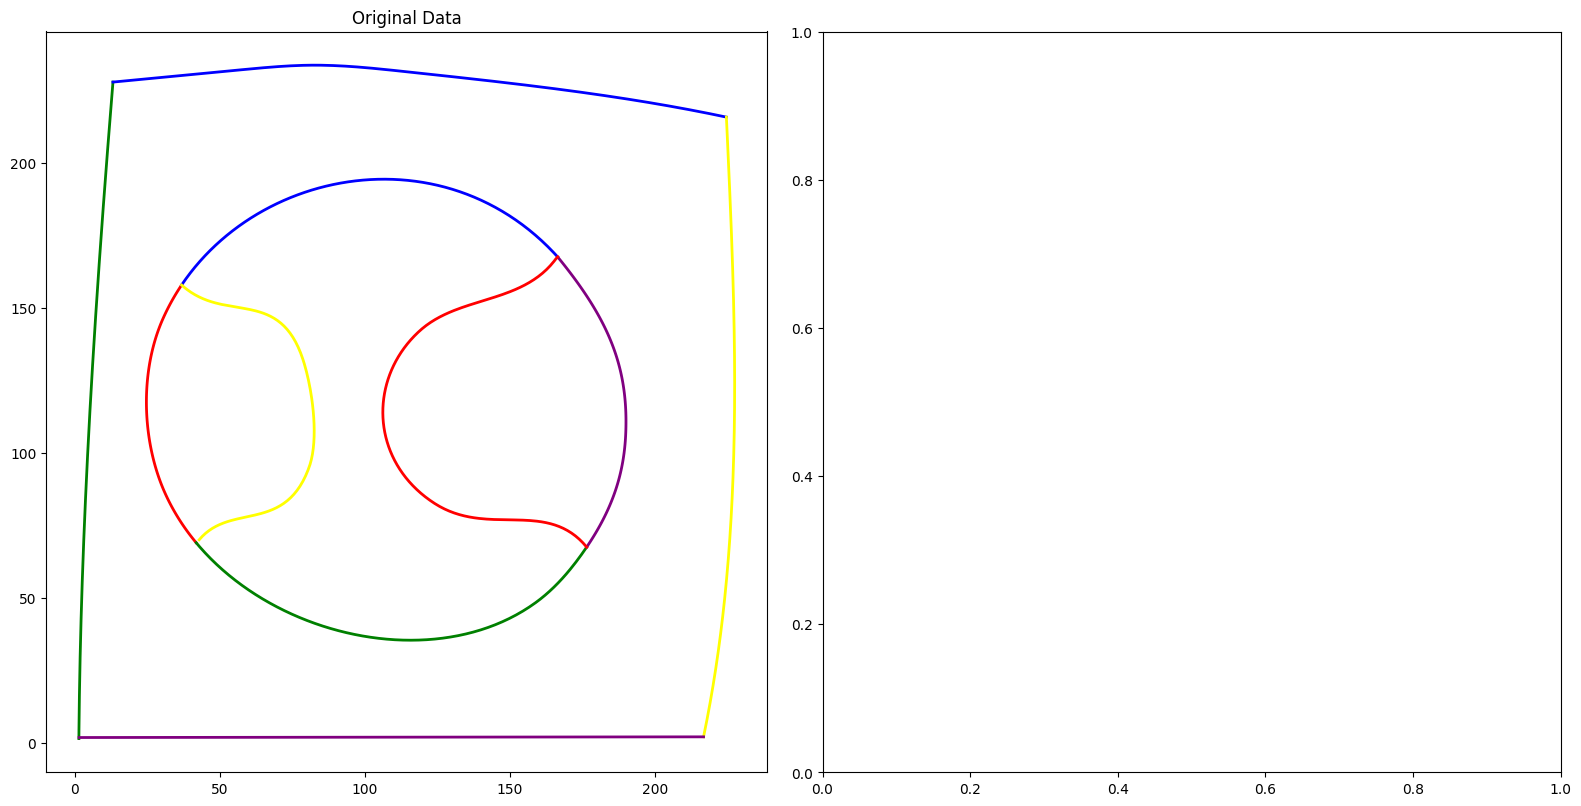

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

# Read and process the CSV files
csv_path1 = "problems/frag0.csv"

output_data1 = read_csv_(csv_path1)
# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plt.show()


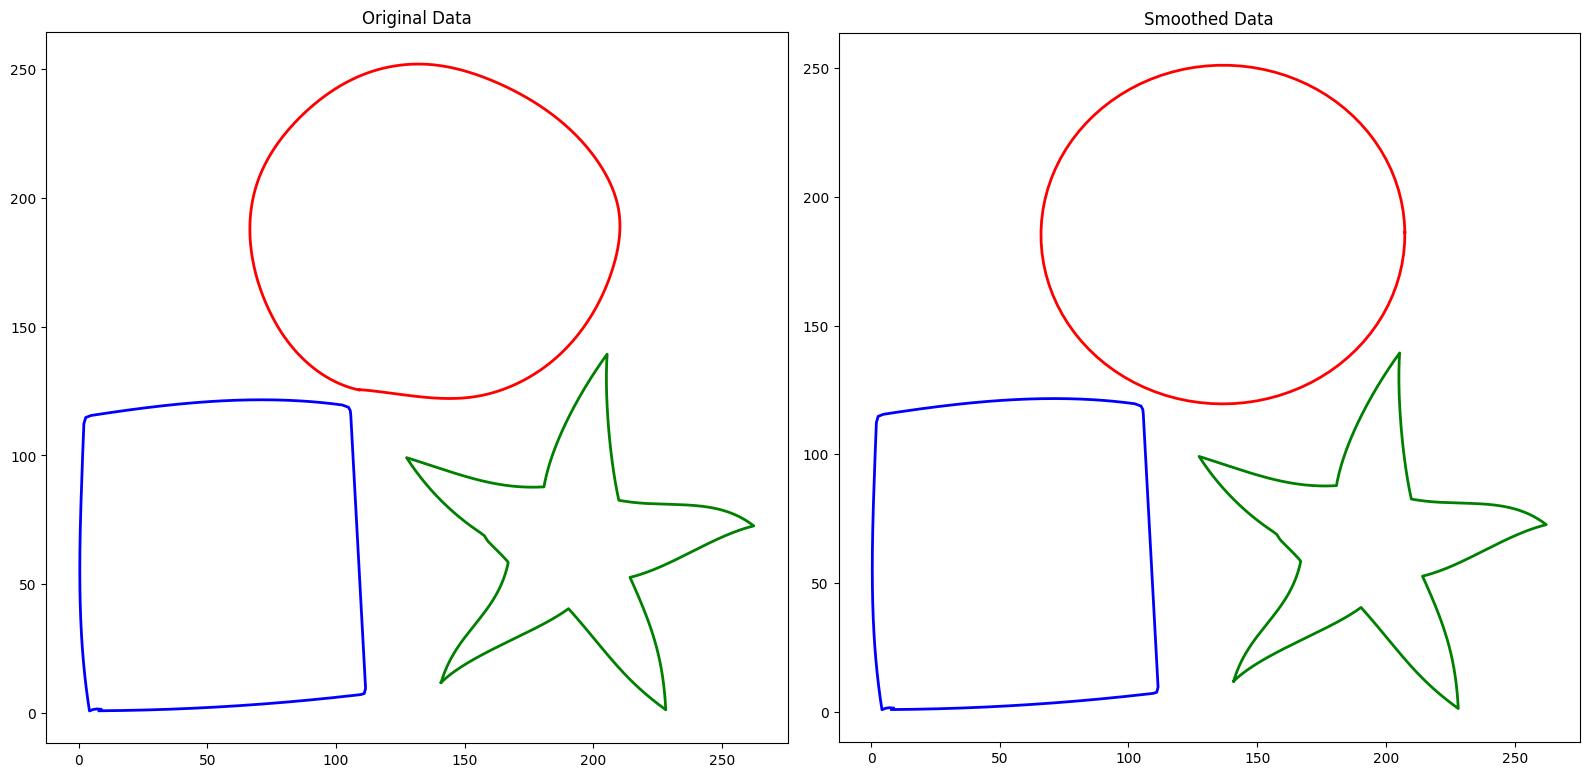

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.signal import savgol_filter

def is_circular(XY, threshold=0.1):
    center = np.mean(XY, axis=0)
    distances = distance.cdist([center], XY)[0]
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    return std_distance / mean_distance < threshold

def smooth_circle(XY):
    cov_mat = np.cov(XY.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    radii = np.sqrt(2 * eig_vals)
    angle = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])
    center = np.mean(XY, axis=0)
    theta = np.linspace(0, 2*np.pi, 100)
    x = radii[0] * np.cos(theta) * np.cos(angle) - radii[1] * np.sin(theta) * np.sin(angle) + center[0]
    y = radii[0] * np.cos(theta) * np.sin(angle) + radii[1] * np.sin(theta) * np.cos(angle) + center[1]
    return np.column_stack((x, y))

def smooth_increasing_curve(XY, window_length=51, polyorder=3):
    x_smoothed = savgol_filter(XY[:, 0], window_length, polyorder)
    y_smoothed = savgol_filter(XY[:, 1], window_length, polyorder)
    return np.column_stack((x_smoothed, y_smoothed))

def is_increasing_no_duplicates(XY):
    return np.all(np.diff(XY[:, 0]) > 0) and np.all(np.diff(XY[:, 1]) > 0)

def smooth_data(XY):
    if is_circular(XY):
        return smooth_circle(XY)
    elif is_increasing_no_duplicates(XY):
        return smooth_increasing_curve(XY)
    else:
        return XY

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

# Read and process the CSV files
csv_path1 = "problems/isolated.csv"
output_data1 = read_csv_(csv_path1)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))

# Plot original data
plot(output_data1, 'Original Data', axs[0])

# Smooth and plot the data
smoothed_data = []
for path in output_data1:
    smoothed_path = []
    for XY in path:
        smoothed_XY = smooth_data(XY)
        smoothed_path.append(smoothed_XY)
    smoothed_data.append(smoothed_path)

plot(smoothed_data, 'Smoothed Data', axs[1])

plt.show()

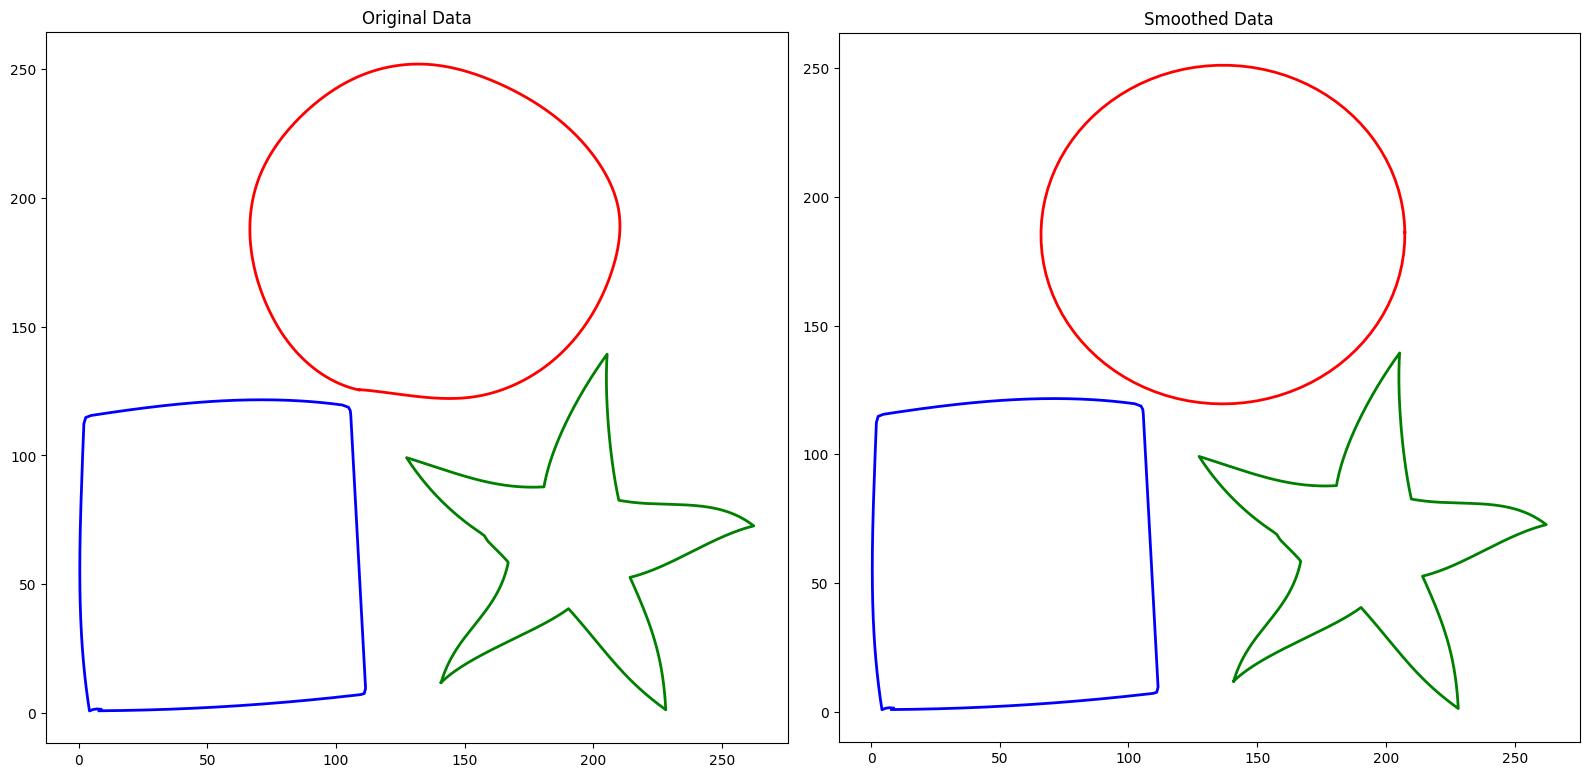

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def is_circular(XY, threshold=0.1):
    center = np.mean(XY, axis=0)
    distances = distance.cdist([center], XY)[0]
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)
    return std_distance / mean_distance < threshold

def smooth_circle(XY):
    cov_mat = np.cov(XY.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    radii = np.sqrt(2 * eig_vals)
    angle = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])
    center = np.mean(XY, axis=0)
    theta = np.linspace(0, 2*np.pi, 100)
    x = radii[0] * np.cos(theta) * np.cos(angle) - radii[1] * np.sin(theta) * np.sin(angle) + center[0]
    y = radii[0] * np.cos(theta) * np.sin(angle) + radii[1] * np.sin(theta) * np.cos(angle) + center[1]
    return np.column_stack((x, y))

def smooth_increasing_curve(XY, window_length=51, polyorder=3):
    x_smoothed = savgol_filter(XY[:, 0], window_length, polyorder)
    y_smoothed = savgol_filter(XY[:, 1], window_length, polyorder)
    return np.column_stack((x_smoothed, y_smoothed))

def is_increasing_no_duplicates(XY):
    return np.all(np.diff(XY[:, 0]) > 0) and np.all(np.diff(XY[:, 1]) > 0)

def is_line(XY, r2_threshold=0.99):
    X = XY[:, 0].reshape(-1, 1)
    y = XY[:, 1]
    model = LinearRegression().fit(X, y)
    r2 = r2_score(y, model.predict(X))
    return r2 > r2_threshold

def smooth_line(XY):
    X = XY[:, 0].reshape(-1, 1)
    y = XY[:, 1]
    model = LinearRegression().fit(X, y)
    y_smoothed = model.predict(X)
    return np.column_stack((X, y_smoothed))

def smooth_data(XY):
    if is_circular(XY):
        return smooth_circle(XY)
    elif is_increasing_no_duplicates(XY):
        return smooth_increasing_curve(XY)
    elif is_line(XY):
        return smooth_line(XY)
    else:
        return XY

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

# Read and process the CSV files
csv_path1 = "problems/isolated.csv"
output_data1 = read_csv_(csv_path1)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))

# Plot original data
plot(output_data1, 'Original Data', axs[0])

# Smooth and plot the data
smoothed_data = []
for path in output_data1:
    smoothed_path = []
    for XY in path:
        smoothed_XY = smooth_data(XY)
        smoothed_path.append(smoothed_XY)
    smoothed_data.append(smoothed_path)

plot(smoothed_data, 'Smoothed Data', axs[1])

plt.show()

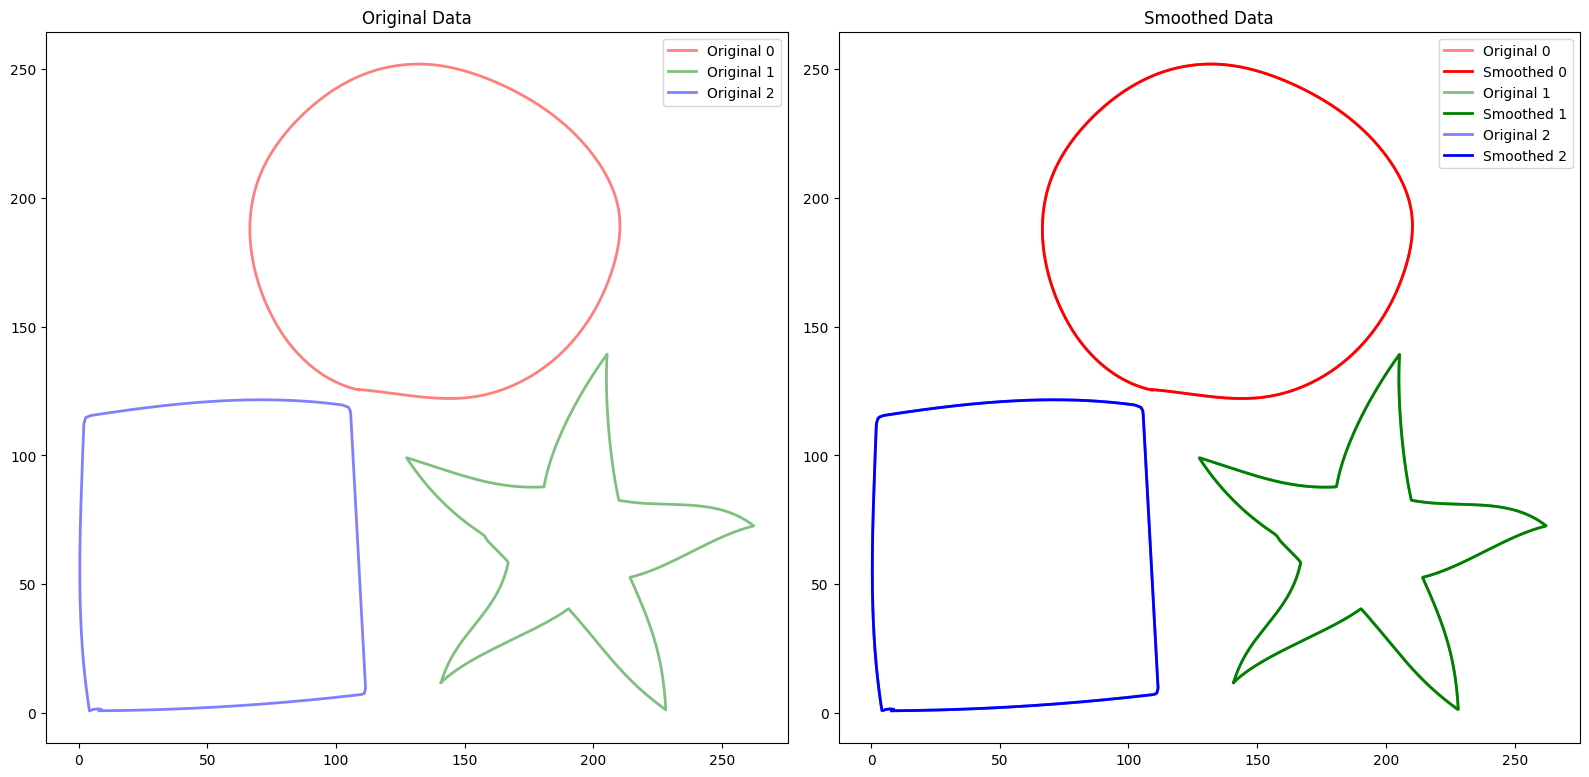

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def smooth_path(path):
    """
    Apply Chaikin's corner cutting algorithm to smooth a path.
    
    :param path: numpy array of shape (n, 2) representing the original path
    :return: numpy array of shape (m, 2) representing the smoothed path
    """
    output = []
    
    # Add the first point of the original path
    if len(path) > 0:
        output.append(path[0])
    
    # Process each pair of consecutive points
    for i in range(len(path) - 1):
        p0 = path[i]
        p1 = path[i + 1]
        
        # Calculate Q point (25% along the line from p0 to p1)
        q = 0.75 * p0 + 0.25 * p1
        
        # Calculate R point (75% along the line from p0 to p1)
        r = 0.25 * p0 + 0.75 * p1
        
        # Add Q and R to the output
        output.append(q)
        output.append(r)
    
    # Add the last point of the original path
    if len(path) > 1:
        output.append(path[-1])
    
    return np.array(output)

def plot(paths_XYs, title, ax, smooth=False):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2, alpha=0.5, label=f'Original {i}')
            if smooth:
                smoothed_XY = smooth_path(XY)
                ax.plot(smoothed_XY[:, 0], smoothed_XY[:, 1], c=c, linewidth=2, label=f'Smoothed {i}')
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.legend()

# Read and process the CSV files
csv_path1 = "problems/isolated.csv"
output_data1 = read_csv_(csv_path1)

# Plot side by side
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plot(output_data1, 'Original Data', axs[0])
plot(output_data1, 'Smoothed Data', axs[1], smooth=True)
plt.show()